In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gurobipy as gp
from gurobipy import GRB
from sklearn.model_selection import train_test_split

## Create sample data

### #1

In [ ]:
# Function to generate samples for loads and wind production
def generate_samples(num_samples, loads, sd, wind_limits, wind_shape):
    data = []
    sd = [mean * sd for mean in loads] # Standard deviation for loads

    for sample_num in range(1, num_samples + 1):
        for hour in range(24):  # Fixed to 24 hours per day
            
            # Generate loads using normal distribution
            load_sample = [
                round(np.clip(np.random.normal(mean, std), 0, mean * 2), 2) 
                for mean, std in zip(loads, sd)
            ]  # Clipping to avoid unrealistic negative values or extreme high values
            
            # Generate wind production using Weibull distribution (typically skewed as most wind clusters around lower speed)
            wind_sample = [
                round(min(np.random.weibull(wind_shape) * 0.42 * limit, limit), 2) 
                for limit in wind_limits
            ]
            
            # Combine into one row with [Sample Number, Hour, L1, L2, L3, W1, W2]
            row = [sample_num, hour] + load_sample + wind_sample
            data.append(row)
    
    return data

# Load L1-L3 and wind capacity W1-W2
loads = [56, 112, 120]  # Mean values for L1, L2, L3
wind_limits = [10, 30]  # Maximum capacity for W1 and W2

# Generate data for the samples
samples_data = generate_samples(num_samples=1000, loads=loads, sd=0.10, 
                                wind_limits=wind_limits, wind_shape=1.1)

# Create column names for the DataFrame
columns = ["Sample_Nr", "Hour", "L1", "L2", "L3", "W1", "W2"] # Sample_Nr ~ Day

# Create the DataFrame
samples_df = pd.DataFrame(samples_data, columns=columns)

# Save to CSV
samples_df.to_csv("sample_simon.csv", index=False)

# Display the updated DataFrame structure
samples_df.head(30)

In [ ]:
# Plot distribution of Wind Production
plt.figure(figsize=(12, 6))
sns.histplot(data=samples_df, x="W1", kde=True, bins=30, color="blue", label="W1")
sns.histplot(data=samples_df, x="W2", kde=True, bins=30, color="red", label="W2")
plt.title("Distribution of Wind Production W1, W2")
plt.xlabel('Wind Production Value')
plt.legend()
plt.show()

### #2

In [ ]:
# Function to generate samples for loads and wind production with final refinements
def generate_samples(num_samples, loads, sd, wind_limits, wind_shape):
    data = []
    sd = [mean * sd for mean in loads]  # Standard deviation for loads

    for sample_num in range(1, num_samples + 1):
        daily_variability = 0.8 + 0.2 * np.clip(np.random.normal(0.5,0.2),0, 1) 
        
        for hour in range(24):  # Fixed to 24 hours per day
            # Generate loads using normal distribution
            load_sample = [
                round(np.clip(np.random.normal(mean, std), 0, mean * 2), 2) 
                for mean, std in zip(loads, sd)
            ]  # Clipping to avoid unrealistic negative values or extreme high values
            
            # Generate wind production -> distinction between W1 and W2 + daily variability
            wind_sample = [
                # round(min((np.random.weibull(wind_shape) * (0.50 if limit == 10 else 0.45) * limit), limit * daily_variability), 2)
                round(min((np.random.weibull(wind_shape) *  0.50 * limit), limit * daily_variability), 2)
                for limit in wind_limits
            ]
            
            # Combine into one row with [Sample Number, Hour, L1, L2, L3, W1, W2]
            row = [sample_num, hour] + load_sample + wind_sample
            data.append(row)
    
    return data

# Load L1-L3 and wind capacity W1-W2
loads = [56, 112, 120]  # Mean values for L1, L2, L3
wind_limits = [10, 30]  # Maximum capacity for W1 and W2

# Generate data for the samples with final refinements
samples_data = generate_samples(num_samples=1000, loads=loads, sd=0.10, 
                                wind_limits=wind_limits, wind_shape=1.1)

# Create column names for the DataFrame
columns = ["Sample_Nr", "Hour", "L1", "L2", "L3", "W1", "W2"]  # Sample_Nr ~ Day

# Create the DataFrame
samples_df = pd.DataFrame(samples_data, columns=columns)

# Save to CSV
samples_df.to_csv("sample_simon.csv", index=False)

# Display the updated DataFrame structure
samples_df.head(30)

,Sample_Nr,Hour,L1,L2,L3,W1,W2
0,1,0,59.51,105.94,125.27,3.90,23.95
1,1,1,53.41,126.24,118.88,1.35,10.80
2,1,2,61.46,92.24,132.66,4.41,21.45
3,1,3,64.45,115.71,111.89,3.65,2.55
4,1,4,50.43,105.08,120.38,0.37,7.12
5,1,5,57.39,127.30,114.65,9.26,6.28
6,1,6,56.96,98.09,133.68,3.29,14.34
7,1,7,51.52,96.69,134.96,3.03,4.28
8,1,8,48.60,122.51,136.00,0.68,27.77
9,1,9,52.80,106.15,133.39,0.45,20.60


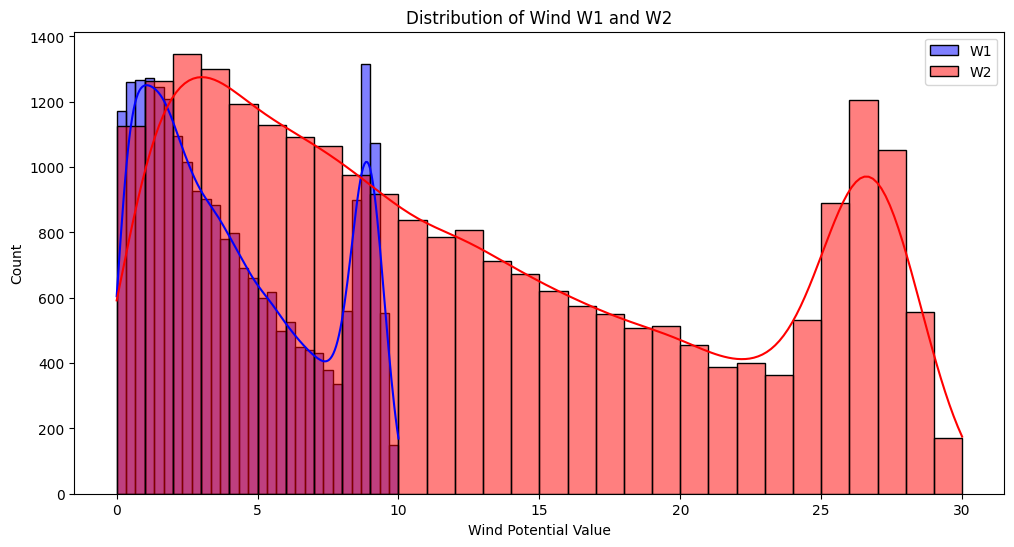

In [125]:
# Plot distribution of Wind Production
plt.figure(figsize=(12, 6))
sns.histplot(data=samples_df, x="W1", kde=True, bins=30, color="blue", label="W1")
sns.histplot(data=samples_df, x="W2", kde=True, bins=30, color="red", label="W2")
plt.title("Distribution of Wind W1 and W2")
plt.xlabel('Wind Potential Value')
plt.legend()
plt.show()

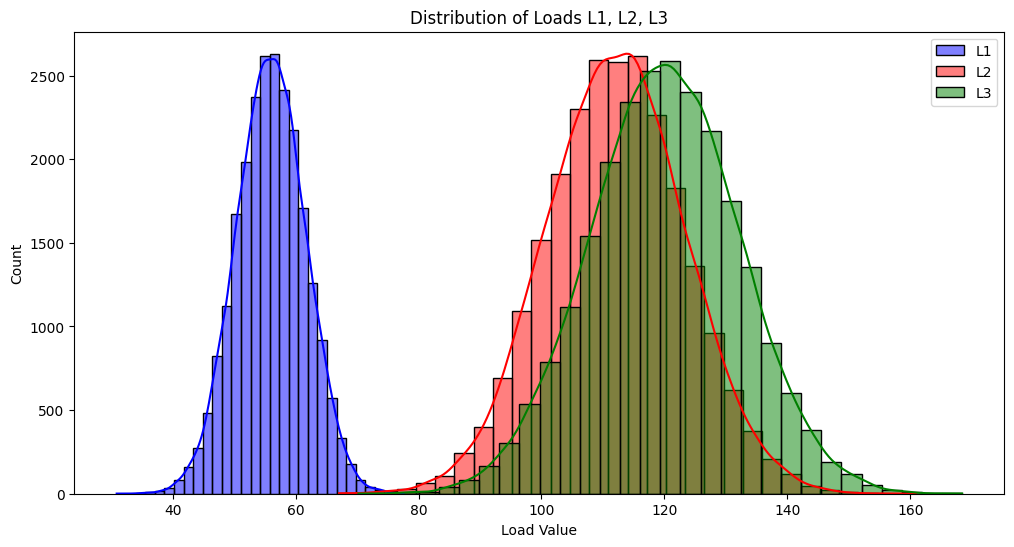

In [ ]:
# Plot of distribution of Loads
plt.figure(figsize=(12, 6))
sns.histplot(data=samples_df, x="L1", kde=True, bins=30, color="blue", label="L1")
sns.histplot(data=samples_df, x="L2", kde=True, bins=30, color="red", label="L2")
sns.histplot(data=samples_df, x="L3", kde=True, bins=30, color="green", label="L3")
plt.title("Distribution of Loads L1, L2, L3")
plt.xlabel('Load Value')
plt.legend()
plt.show()

### #3 (FINAL)

Without influence of prev_wind value:

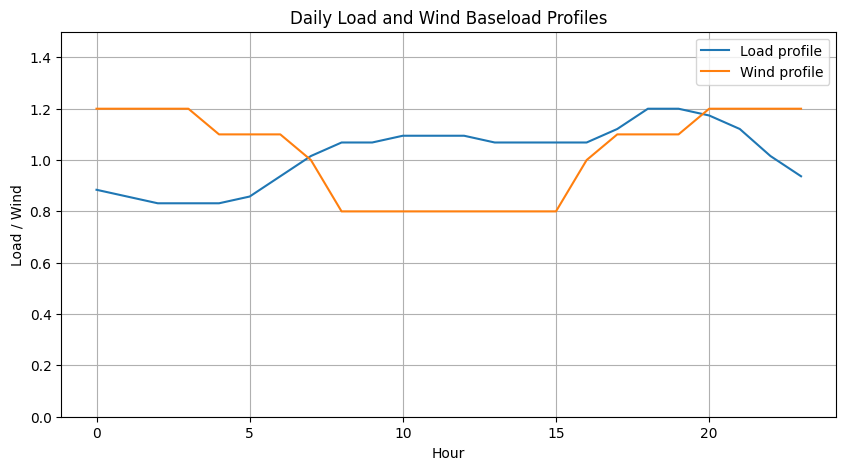

In [21]:
# Function to generate samples for loads and wind production, using baseload daily profiles and adding variability
wind_profile = [1.2, 1.2, 1.2, 1.2, 1.1, 1.1, 1.1, 1.0, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.0, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2]
load_profile = [13, 12.5, 12, 12, 12, 12.5, 14, 15.5, 16.5, 16.5, 17, 17, 17, 16.5, 16.5, 16.5, 16.5, 17.5, 19, 19, 18.5, 17.5, 15.5, 14]
# Normalize daily load profile
load_profile = np.array(load_profile) / max(load_profile) + 0.2

# Function to generate samples for loads and wind production
def generate_samples(
    daily_load_baseload_profile, daily_wind_baseload_profile,num_samples, loads_mean, wind_mean, sd_daily=0.1, sd_hourly=0.05, sd_L=0.1, sd_W=0.2, wind_shape=1.75):

    data = []
    for sample_num in range(1, num_samples + 1):
        # Daily variability for all features
        daily_var = np.random.normal(0, sd_daily)
        hourly_var2 = np.random.weibull(wind_shape) * 0.40 # Wind variability

        for hour in range(24):
            # Hourly variability
            hourly_var = np.random.normal(0, sd_hourly)
            weibull_var = np.random.weibull(wind_shape) * 0.35 # Wind variability

            # Generate loads using normal distribution
            load_sample = [
                round(
                    np.clip(
                        np.random.normal(
                            mean * daily_load_baseload_profile[hour] * (1 + daily_var) * (1 + hourly_var), mean * sd_L), 0, mean * 2), 2)
                for mean in loads_mean
            ]

            # Generate wind using Weibull distribution
            wind_sample = [
                round(np.clip(np.random.normal(daily_wind_baseload_profile[hour] * hourly_var2, sd_W),0 + hourly_var**2, 1-hourly_var**2) * mean, 2)
                for mean in wind_mean
            ]


            # Combine into a single row
            row = [sample_num, hour] + load_sample + wind_sample
            data.append(row)
    return data

# Define parameters
loads_mean = [56, 112, 120]  # Mean loads for L1, L2, L3
wind_mean = [10, 30]  # Mean wind capacities for W1, W2

# Call the function
samples_data = generate_samples(load_profile, wind_profile, num_samples=10, loads_mean=loads_mean, wind_mean=wind_mean)

# Define column names
columns = ["Sample_Nr", "Hour", "L1", "L2", "L3", "W1", "W2"]

# Convert to DataFrame
samples_df = pd.DataFrame(samples_data, columns=columns)

# Plot the daily profiles, with y axis going from 0 to 1.5
plt.figure(figsize=(10, 5))
plt.plot(load_profile, label="Load profile")
plt.plot(wind_profile, label="Wind profile")
plt.ylabel("Load / Wind")
plt.ylim(0,1.5)
plt.xlabel("Hour")
plt.legend()
plt.title("Daily Load and Wind Baseload Profiles")
plt.grid(True)
plt.show()

With influence of prev_wind value:

In [18]:
def generate_samples(
    daily_load_baseload_profile, daily_wind_baseload_profile,
    num_samples, loads_mean, wind_mean, sd_daily=0.1, sd_hourly=0.05, sd_L=0.1, sd_W=0.2, wind_shape=2
):
    data = []
    for sample_num in range(1, num_samples + 1):
        # Daily variability for all features
        daily_var = np.random.normal(0, sd_daily)

        # Initialize previous wind production values for each turbine
        prev_wind = [0.5] * len(wind_mean)  # Start with 0 for all wind turbines

        for hour in range(24):
            # Hourly variability
            hourly_var = np.random.normal(0, sd_hourly)
            weibull_wind_var = np.random.weibull(wind_shape) * 0.35

            # Generate loads using normal distribution
            load_sample = [
                round(
                    np.clip(
                        np.random.normal(
                            mean * daily_load_baseload_profile[hour] * (1 + daily_var) * (1 + hourly_var), 
                            mean * sd_L
                        ), 
                        0, 
                        mean * 2
                    ), 2
                )
                for mean in loads_mean
            ]

            # Generate wind using reduced dependency on previous values and dampening
            wind_sample = [
                round(
                    np.clip(
                        np.random.normal(
                            daily_wind_baseload_profile[hour] * (weibull_wind_var + 0.10 * prev_wind[i]), sd_W), 0, 1) * mean, 2)
                for i, mean in enumerate(wind_mean)
            ]

            # Update previous wind production values
            prev_wind = wind_sample.copy() / np.array(wind_mean)

            # Combine into a single row
            row = [sample_num, hour] + load_sample + wind_sample
            data.append(row)
    return data

# Define parameters
loads_mean = [56, 112, 120]  # Mean loads for L1, L2, L3
wind_mean = [10, 30]  # Mean wind capacities for W1, W2

# Call the function
samples_data = generate_samples(load_profile, wind_profile, num_samples=5, loads_mean=loads_mean, wind_mean=wind_mean)

# Define column names
columns = ["Sample_Nr", "Hour", "L1", "L2", "L3", "W1", "W2"]

# Convert to DataFrame
samples_df = pd.DataFrame(samples_data, columns=columns)

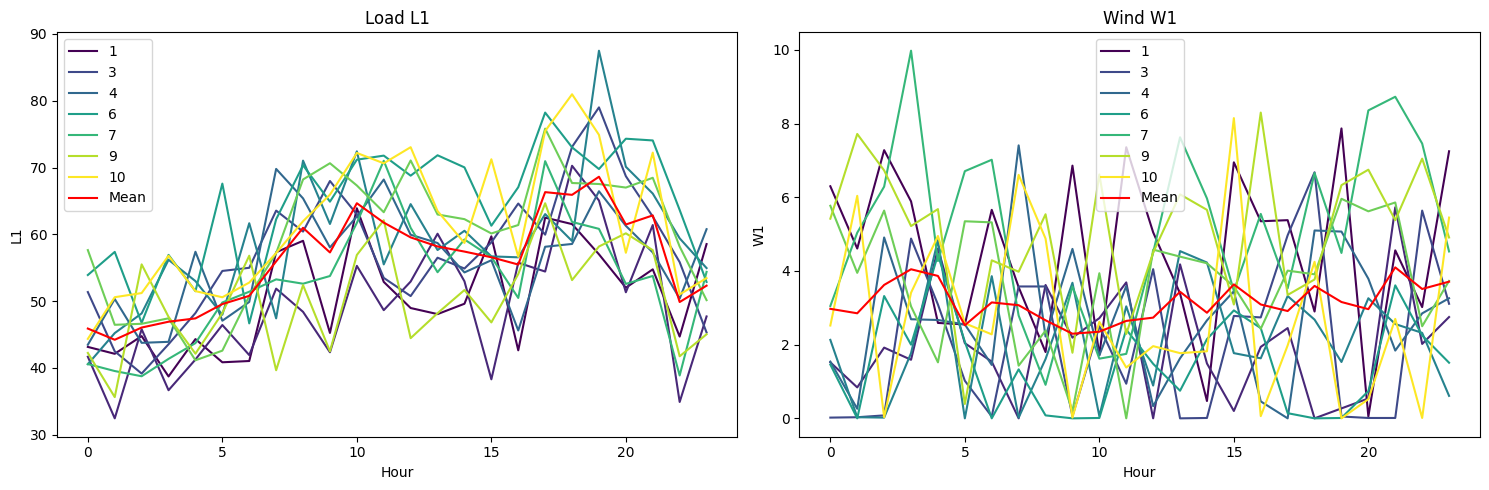

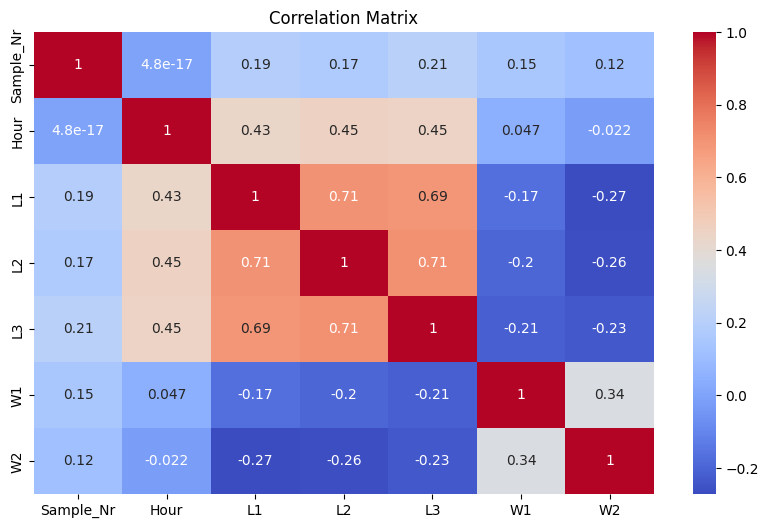

In [22]:
# Plot the samples for load L1 and W1 in two subplots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x="Hour", y="L1", data=samples_df, hue="Sample_Nr", palette="viridis")
# Add average load line per hour
sns.lineplot(x="Hour", y="L1", data=samples_df, color="red", label="Mean", errorbar=None)
plt.title("Load L1")
plt.subplot(1, 2, 2)
sns.lineplot(x="Hour", y="W1", data=samples_df, hue="Sample_Nr", palette="viridis")
# Add average wind line per hour
sns.lineplot(x="Hour", y="W1", data=samples_df, color="red", label="Mean", errorbar=None)
plt.title("Wind W1")
plt.tight_layout()
plt.show()

# Correlation Matrix
corr = samples_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

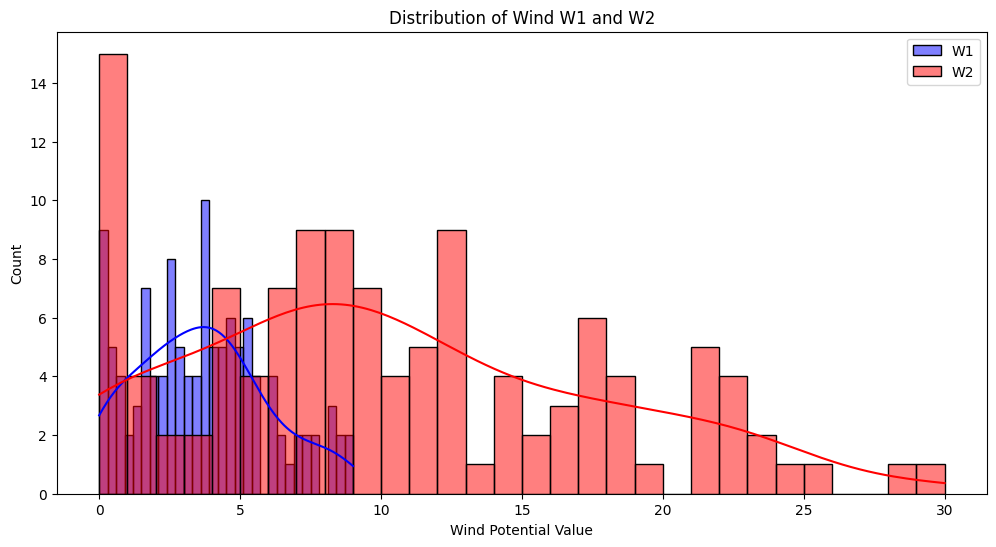

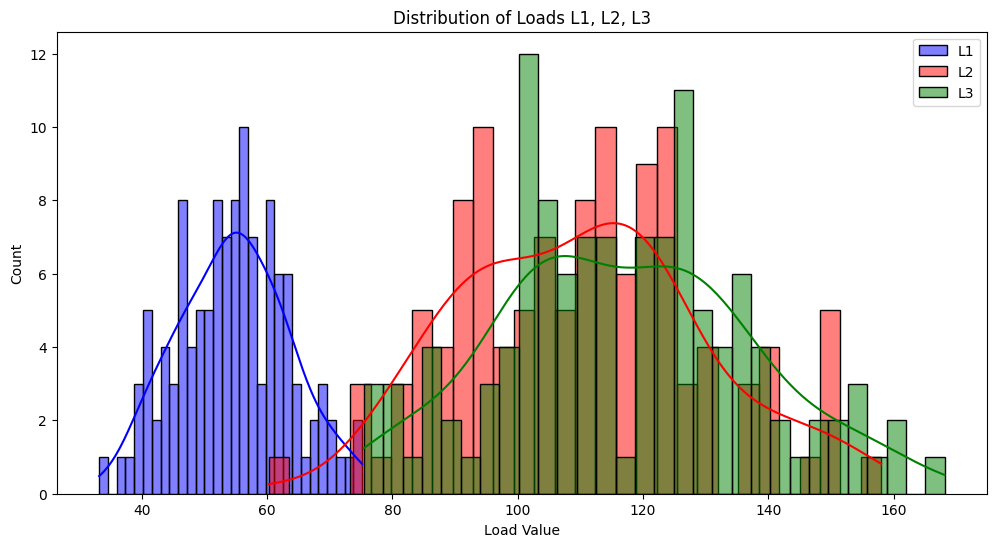

In [20]:
# Plot distribution of Wind Production
plt.figure(figsize=(12, 6))
sns.histplot(data=samples_df, x="W1", kde=True, bins=30, color="blue", label="W1")
sns.histplot(data=samples_df, x="W2", kde=True, bins=30, color="red", label="W2")
plt.title("Distribution of Wind W1 and W2")
plt.xlabel('Wind Potential Value')
plt.legend()
plt.show()

# Plot of distribution of Loads
plt.figure(figsize=(12, 6))
sns.histplot(data=samples_df, x="L1", kde=True, bins=30, color="blue", label="L1")
sns.histplot(data=samples_df, x="L2", kde=True, bins=30, color="red", label="L2")
sns.histplot(data=samples_df, x="L3", kde=True, bins=30, color="green", label="L3")
plt.title("Distribution of Loads L1, L2, L3")
plt.xlabel('Load Value')
plt.legend()
plt.show()